https://youtu.be/wQ8BIBpya2k

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Import mnist dataset of digits
mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Use sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # Flatten layer, rather than use numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Dense layer, 128 units (neurons), rectified linear activation fnc
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Second layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer, softmax as probability distribution

# Parameters for training the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.2578 - acc: 0.9249
Epoch 2/3
60000/60000 [==============================] - 3s 54us/step - loss: 0.1065 - acc: 0.9669
Epoch 3/3
60000/60000 [==============================] - 3s 53us/step - loss: 0.0734 - acc: 0.9766


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 22us/step
0.09035177694400773 0.9728


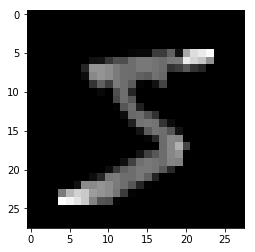

In [4]:
# Show a sample impage
plt.imshow(x_train[0], cmap='Greys_r')
plt.show()

In [5]:
# Save the model
# model.save('epic_num_reader.model',overwrite=True) # Does not appear to be working in TF 1.11

In [7]:
# Load model
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [8]:
# Get predictions
predictions = new_model.predict([x_test])

In [9]:
print(predictions)

[[1.88999802e-08 2.47042209e-07 5.29780111e-04 ... 9.99399662e-01
  1.08888651e-06 5.12877456e-08]
 [2.97073303e-11 1.79405836e-03 9.98175025e-01 ... 3.11491760e-07
  1.37136794e-06 2.00847478e-10]
 [7.27115832e-07 9.99881744e-01 1.04910032e-05 ... 8.55495236e-05
  1.08305394e-05 1.08318190e-07]
 ...
 [6.57680403e-07 1.05236895e-05 9.86409646e-07 ... 6.90770510e-04
  1.99448532e-05 4.98821086e-04]
 [9.56408694e-05 1.82490010e-04 1.42403733e-05 ... 3.06524962e-05
  5.70899481e-03 2.65013767e-07]
 [1.22502428e-07 1.52857226e-07 5.47832855e-08 ... 9.81624851e-11
  2.22379867e-07 1.87999127e-09]]


In [11]:
print(np.argmax(predictions[0]))

7


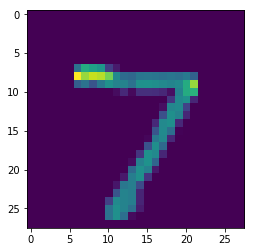

In [12]:
plt.imshow(x_test[0])
plt.show()